In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import cvxpy as cp

In [2]:
digits = load_digits()
X, y = digits.data, digits.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
n, d = X_train_scaled.shape
num_classes = 10

In [6]:
w = [cp.Variable(d) for _ in range(num_classes)]
b = [cp.Variable() for _ in range(num_classes)]
C = 1.0

loss = 0
for i in range(num_classes):
    y_i = 2 * (y_train == i) - 1
    loss += cp.sum(cp.pos(1 - cp.multiply(y_i, X_train_scaled @ w[i] - b[i]))) + 0.5 * cp.norm(w[i], 2) ** 2
problem = cp.Problem(cp.Minimize(loss))

problem.solve()

205.07812099549332

In [7]:
scores = np.array([X_test_scaled @ w[i].value - b[i].value for i in range(num_classes)])
y_pred = np.argmax(scores, axis=0)
y_pred

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 4, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 3, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 2, 9, 3, 8, 7, 2, 9, 0, 4, 5, 3, 6, 5, 8, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 2, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 1, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 5, 1, 5,
       5, 1, 5, 2, 8, 8, 9, 5, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

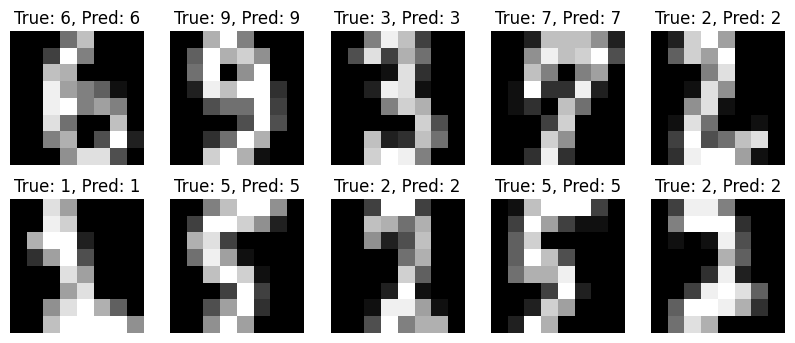

In [8]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
    ax.axis('off')

plt.show()

In [9]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.95
